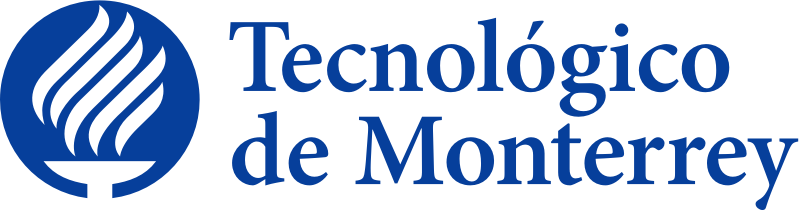

## **Aplicaciones de Inteligencia Artificial en el Trading de Criptomonedas**


Maestría en Inteligencia Artificial Aplicada

**Proyecto integrador**
(TC3510)
\
\
Profesores titulares:

Dra. Grettel Barceló Alonso\
Dr. Luis Eduardo Falcón Morales
\
\
**Avance 1: Análisis exploratorio de datos**
\
\
Equipo 48

Rogelio Chávez López -                 		A01794226

## Setup

In [148]:
apikey = 'MNA'
apisecret = ''

In [149]:
!pip install python-binance pandas mplfinance

In [150]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

Autenticación en Binance

In [151]:
client = Client(apikey, apisecret)

BinanceAPIException: APIError(code=0): Service unavailable from a restricted location according to 'b. Eligibility' in https://www.binance.com/en/terms. Please contact customer service if you believe you received this message in error.

## API Test

Pulling test data from binance using Binance API

In [ ]:
tickers = client.get_all_tickers()

In [ ]:
tickers

In [ ]:
ticker_dataframe = pd.DataFrame(tickers)

In [ ]:
ticker_dataframe.head(15)

In [ ]:
depth = client.get_order_book(symbol='ETHUSDT')

In [ ]:
depth

In [ ]:
depth_dataframe = pd.DataFrame(depth['asks'])
depth_dataframe.columns = ['Price', 'Volume']
depth_dataframe.head()

In [ ]:
depth_dataframe.dtypes

## Bitcoin Data

Pulling Bitcoin data from binance using Binance API

### Data Wrangling

In [ ]:
historical_data = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_15MINUTE, '1 january 2024')

In [ ]:
historical_data

In [ ]:
hist_df = pd.DataFrame(historical_data)

In [ ]:
hist_df.tail()

In [ ]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume',
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [ ]:
hist_df.head()

In [ ]:
hist_df.dtypes

In [ ]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')

In [ ]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

In [ ]:
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [ ]:
hist_df.tail()

In [ ]:
hist_df.dtypes

### Candle Graphic 1 - BTC

In [30]:
import mplfinance as mpf

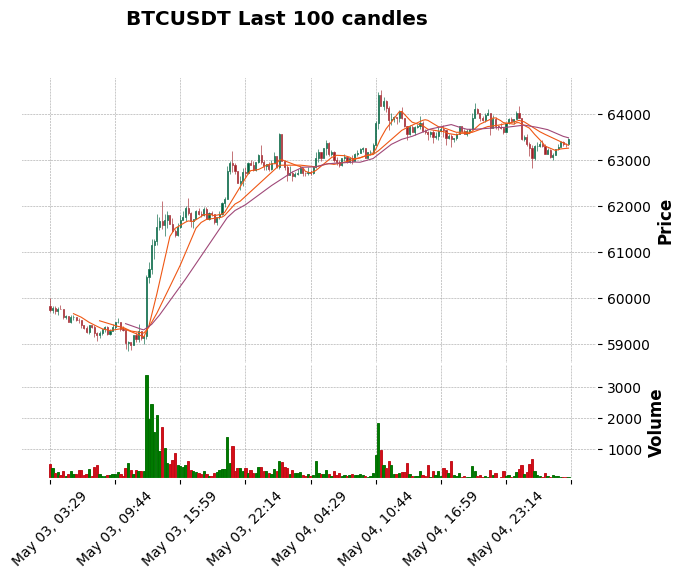

In [31]:
mpf.plot(hist_df.set_index('Close Time').tail(200),
        type='candle', style='charles',
        volume=True,
        title='BTCUSDT Last 100 candles',
        mav=(10,20,30))

### Save Data to Google Drive

In [32]:
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# Crear el Dataframe a respaldar
df = pd.DataFrame(hist_df)

# Guardar el DataFrame en un archivo CSV en Google Drive
df.to_csv('/content/drive/My Drive/Datos/binance/precios_cripto.csv', index=False)

print("DataFrame guardado como 'precios_cripto.csv' en Google Drive.")

Mounted at /content/drive
DataFrame guardado como 'precios_cripto.csv' en Google Drive.


### Load Data from Drive

In [1]:
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# Ruta al archivo CSV en Google Drive
file_path = '/content/drive/My Drive/Datos/binance/precios_cripto.csv'

# Leer el archivo CSV usando pandas
histo_df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataframe
print(histo_df.head())



Mounted at /content/drive
             Open Time      Open      High       Low     Close     Volume  \
0  2024-03-01 00:00:00  61130.99  61338.72  61126.00  61224.49  512.96054   
1  2024-03-01 00:15:00  61224.49  61749.00  61193.71  61716.74  639.28304   
2  2024-03-01 00:30:00  61716.74  61741.10  61519.42  61583.53  366.15793   
3  2024-03-01 00:45:00  61583.52  61649.99  61447.30  61501.11  349.39751   
4  2024-03-01 01:00:00  61501.10  61501.11  61283.60  61340.71  346.87049   

                      Close Time  Quote Asset Volume  Number of Trades  \
0  2024-03-01 00:14:59.999000064        3.140623e+07             16161   
1  2024-03-01 00:29:59.999000064        3.930979e+07             24470   
2  2024-03-01 00:44:59.999000064        2.256452e+07             13120   
3  2024-03-01 00:59:59.999000064        2.149550e+07             13053   
4  2024-03-01 01:14:59.999000064        2.129074e+07             14377   

   TB Base Volume  TB Quote Volume  Ignore  
0       274.99802    

In [2]:
histo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6261 entries, 0 to 6260
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open Time           6261 non-null   object 
 1   Open                6261 non-null   float64
 2   High                6261 non-null   float64
 3   Low                 6261 non-null   float64
 4   Close               6261 non-null   float64
 5   Volume              6261 non-null   float64
 6   Close Time          6261 non-null   object 
 7   Quote Asset Volume  6261 non-null   float64
 8   Number of Trades    6261 non-null   int64  
 9   TB Base Volume      6261 non-null   float64
 10  TB Quote Volume     6261 non-null   float64
 11  Ignore              6261 non-null   int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 587.1+ KB


In [3]:
histo_df.describe()

Open         High           Low         Close       Volume  \
count   6261.000000   6261.00000   6261.000000   6261.000000  6261.000000   
mean   66335.239278  66480.40923  66177.186344  66335.609452   496.650066   
std     3419.308437   3411.87389   3427.338996   3418.866644   521.555621   
min    56773.990000  57000.00000  56552.820000  56773.990000    35.953770   
25%    63742.070000  63869.09000  63596.140000  63742.050000   203.736420   
50%    66435.010000  66576.39000  66285.130000  66435.010000   338.731600   
75%    69225.990000  69340.00000  69076.000000  69225.990000   594.471300   
max    73607.800000  73777.00000  73400.000000  73607.800000  8491.630120   

       Quote Asset Volume  Number of Trades  TB Base Volume  TB Quote Volume  \
count        6.261000e+03       6261.000000     6261.000000     6.261000e+03   
mean         3.285970e+07      22681.677208      247.155184     1.636588e+07   
std          3.419675e+07      18476.659449      259.567872     1.709681e+07   
min          2.289171e+06       3169.000000       17.251660     1.101761e+06   
25%          1.341875e+07      12217.000000       98.286070     6.530987e+06   
50%          2.252967e+07      17846.000000      169.505190     1.123438e+07   
75%          3.963304e+07      26607.000000      297.081910     1.971243e+07   
max          5.312305e+08     330919.000000     3592.141980     2.249418e+08   

       Ignore  
count  6261.0  
mean      0.0  
std       0.0  
min       0.0  
25%       0.0  
50%       0.0  
75%       0.0  
max       0.0

###Exploratory Data Analysis (EDA)

Los datos se cargan del drive de google toda vez que la API de Binance solo esta disponible en ciertos horarios. La key de la API tambien se a elimando de este notebook

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from scipy.stats import skew, kurtosis, shapiro
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

**¿Hay valores faltantes en el conjunto de datos?**

In [5]:
# Descripción general del conjunto de datos y verificación de valores faltantes
print("")
print("Resumen del conjunto de datos: Descripción general del conjunto de datos:")
print("")
print(histo_df.info())



Resumen del conjunto de datos: Descripción general del conjunto de datos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6261 entries, 0 to 6260
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open Time           6261 non-null   object 
 1   Open                6261 non-null   float64
 2   High                6261 non-null   float64
 3   Low                 6261 non-null   float64
 4   Close               6261 non-null   float64
 5   Volume              6261 non-null   float64
 6   Close Time          6261 non-null   object 
 7   Quote Asset Volume  6261 non-null   float64
 8   Number of Trades    6261 non-null   int64  
 9   TB Base Volume      6261 non-null   float64
 10  TB Quote Volume     6261 non-null   float64
 11  Ignore              6261 non-null   int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 587.1+ KB
None


**Respuesta**: El DataFrame "hist_df" tiene un total de **6,261** registros y **12 columnas**. No hay valores faltantes en ninguna de las columnas, lo anterior se puede verificar ya que todas las columnas tienen un recuento de valores no nulos igual al número total de entradas (6,261), es decir no hay datos nulos.

**¿Se pueden identificar patrones de ausencia?**


In [6]:
# Valores faltantes
print("\nValores faltantes en el conjunto de datos:")
print("")
print(histo_df.isnull().sum())


Valores faltantes en el conjunto de datos:

Open Time             0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Close Time            0
Quote Asset Volume    0
Number of Trades      0
TB Base Volume        0
TB Quote Volume       0
Ignore                0
dtype: int64


**Respuesta:**Se corrobora que tampoco hay datos faltantes en ninguna de las columnas del dataframe. De momento no es posible identificar algun tipo de patron de datos ausentes, seguiremos haciendo esta evaluacion para poder anticipar alguna respuesta en caso de que se presenten valores nulos.

In [7]:
# Convertir las columnas de fecha y hora al tipo de datos adecuado
histo_df['Open Time'] = pd.to_datetime(histo_df['Open Time'])
histo_df['Close Time'] = pd.to_datetime(histo_df['Close Time'])

**¿Cuáles son las estadísticas resumidas del conjunto de datos?**


In [8]:
# Estadísticas resumidas del conjunto de datos
print("\nEstadísticas resumidas del conjunto de datos:")
print("")
histo_df.describe()


Estadísticas resumidas del conjunto de datos:



Open Time          Open         High           Low  \
count                           6261   6261.000000   6261.00000   6261.000000   
mean   2024-04-02 14:30:00.000000256  66335.239278  66480.40923  66177.186344   
min              2024-03-01 00:00:00  56773.990000  57000.00000  56552.820000   
25%              2024-03-17 07:15:00  63742.070000  63869.09000  63596.140000   
50%              2024-04-02 14:30:00  66435.010000  66576.39000  66285.130000   
75%              2024-04-18 21:45:00  69225.990000  69340.00000  69076.000000   
max              2024-05-05 05:00:00  73607.800000  73777.00000  73400.000000   
std                              NaN   3419.308437   3411.87389   3427.338996   

              Close       Volume                     Close Time  \
count   6261.000000  6261.000000                           6261   
mean   66335.609452   496.650066  2024-04-02 14:44:59.999000320   
min    56773.990000    35.953770  2024-03-01 00:14:59.999000064   
25%    63742.050000   203.736420  2024-03-17 07:29:59.999000064   
50%    66435.010000   338.731600  2024-04-02 14:44:59.999000064   
75%    69225.990000   594.471300  2024-04-18 21:59:59.999000064   
max    73607.800000  8491.630120  2024-05-05 05:14:59.999000064   
std     3418.866644   521.555621                            NaN   

       Quote Asset Volume  Number of Trades  TB Base Volume  TB Quote Volume  \
count        6.261000e+03       6261.000000     6261.000000     6.261000e+03   
mean         3.285970e+07      22681.677208      247.155184     1.636588e+07   
min          2.289171e+06       3169.000000       17.251660     1.101761e+06   
25%          1.341875e+07      12217.000000       98.286070     6.530987e+06   
50%          2.252967e+07      17846.000000      169.505190     1.123438e+07   
75%          3.963304e+07      26607.000000      297.081910     1.971243e+07   
max          5.312305e+08     330919.000000     3592.141980     2.249418e+08   
std          3.419675e+07      18476.659449      259.567872     1.709681e+07   

       Ignore  
count  6261.0  
mean      0.0  
min       0.0  
25%       0.0  
50%       0.0  
75%       0.0  
max       0.0  
std       0.0

**Respuesta:** De la salida anterior podemos anticipar rapidamente lo siguiente:

**Media (mean) y mediana (50%):** Los promedios y las medianas de las diferentes columnas que proporcionan una idea de la tendencia central de los datos para la columna "High" (máximo), la media es 67,068.93, mientras que el valor mediano es aproximadamente 67,053.33\
**Desviación estándar (std):** Como es sabido, la desviación estándar ayuda a conocer la dispersión de los datos alrededor de la media. En el caso de la columna "Volume" con un valor de aproximadamente 524.62, se podría deducir una mayor variabilidad en los datos.\
**Percentiles (25%, 50%, 75%)**: Los percentiles dividen los datos en partes iguales. Por ejemplo, el percentil 25% (primer cuartil) para la columna "Close" es de aproximadamente 64,540.00, lo que indica que el 25% de los datos tienen un valor de cierre igual o inferior a este valor.

**¿Hay valores atípicos en el conjunto de datos?**

Al analizar las estadísticas resumidas de la pregunta anterior, hay algunos indicios de la presencia de valores atípicos en el conjunto de datos:\
\
**Diferencia entre la media y la mediana (50%):** Para algunas columnas, como "*Volume*" y "*TB Quote Volume*", la media es considerablemente mayor que la mediana. Esto sugiere la posible presencia de valores atípicos en el extremo superior de la distribución, toda vez que la media podria estar afectada por valores extremadamente altos.\
**Diferencia entre el tercer cuartil (75%) y el máximo:** En todas las columnas numéricas, especialmente en "*Quote Asset Volume*" y "*TB Quote Volume*", hay una gran diferencia entre el tercer cuartil y el máximo. Esto indica la posible presencia de valores atípicos en el extremo superior de la distribución, ya que el máximo está muy por encima del rango intercuartílico.\
**Valores máximos significativamente mayores que el tercer cuartil:** Para las columnas "*Quote Asset Volume*" y "*TB Quote Volume*", los valores máximos son mucho mayores que el tercer cuartil. Esto también sugiere la presencia de valores atípicos en el extremo superior de la distribución.\
Lo anterior sugiere que podría estar ante valores atípicos en las columnas "Volume", "Quote Asset Volume" y "TB Quote Volume", lo que podría afectar significativamente a las medidas de tendencia central y dispersión de estas variables. Sería prudente realizar un análisis más detallado, como la visualización de los datos y la identificación de los valores específicos que están influenciando estos resultados.

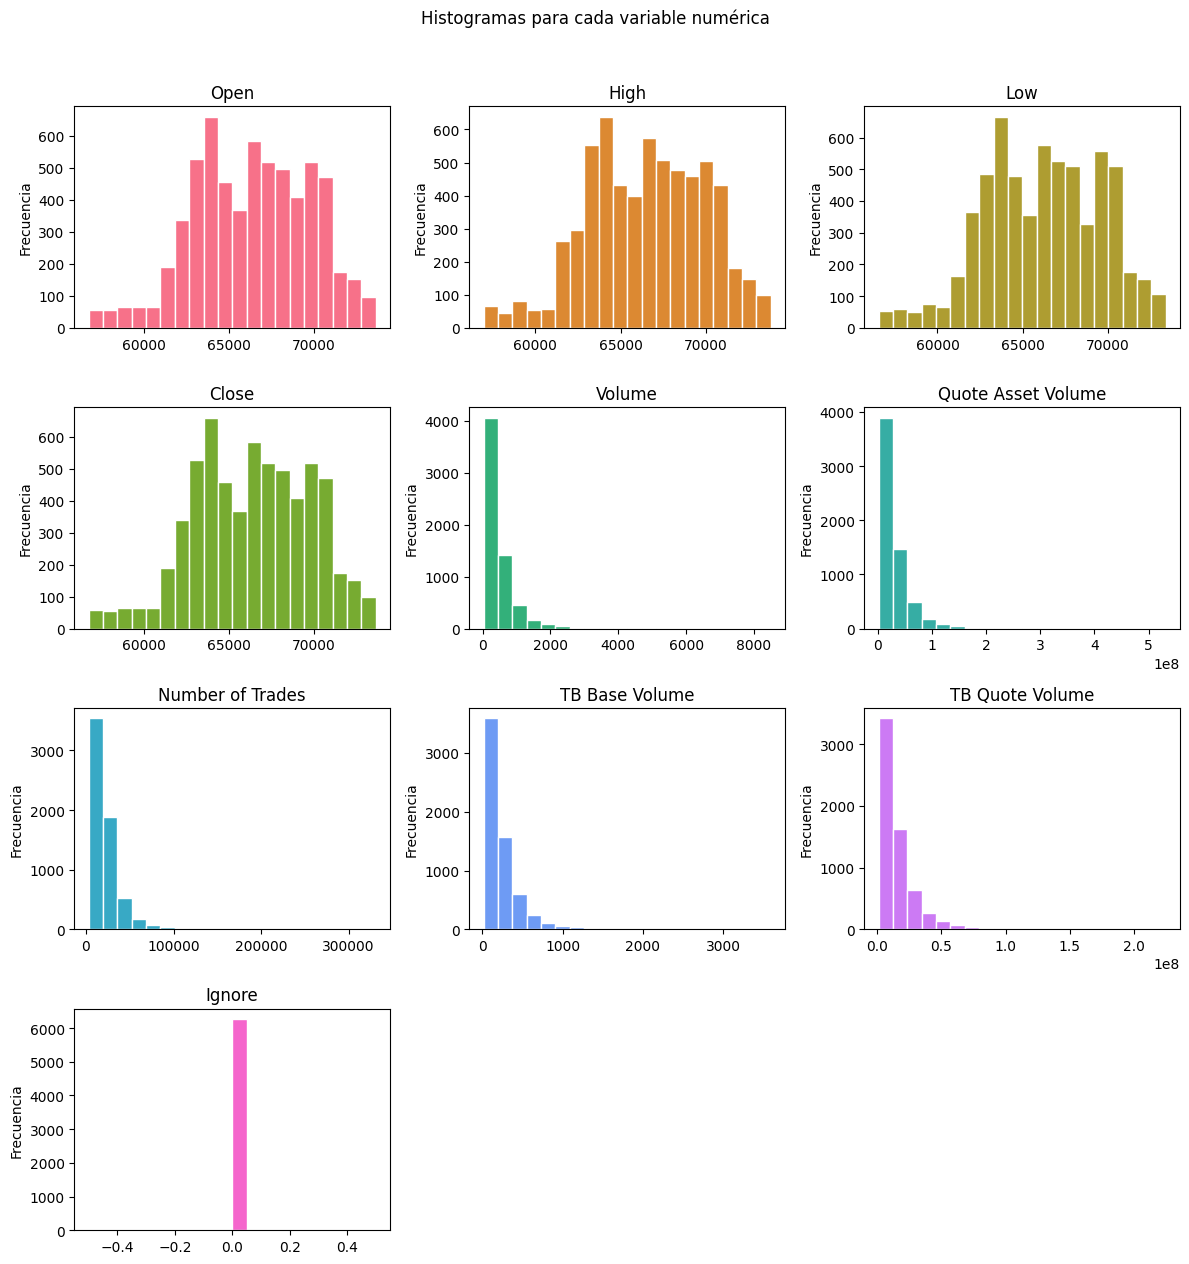

In [9]:
# Definir las columnas numéricas
numeric_cols = histo_df.select_dtypes(include=['float64', 'int64']).columns

# Crear una paleta de colores
palette = sns.color_palette("husl", n_colors=len(numeric_cols))

# Calcular el número de filas y columnas necesario para mostrar todos los histogramas
num_plots = len(numeric_cols)
num_cols = 3
num_rows = -(-num_plots // num_cols)  # Round up

# Ajustar el tamaño de la figura
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 3*num_rows))

# Trazar cada histograma con su color correspondiente de la paleta
for i, column in enumerate(numeric_cols):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    color = palette[i]
    histo_df[column].hist(ax=ax, bins=20, grid=False, color=color, edgecolor='white')
    ax.set_title(column)
    ax.set_ylabel('Frecuencia')

# Eliminar subplots no utilizados
for i in range(num_plots, num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los histogramas
plt.suptitle("Histogramas para cada variable numérica", y=1.05)
plt.show()

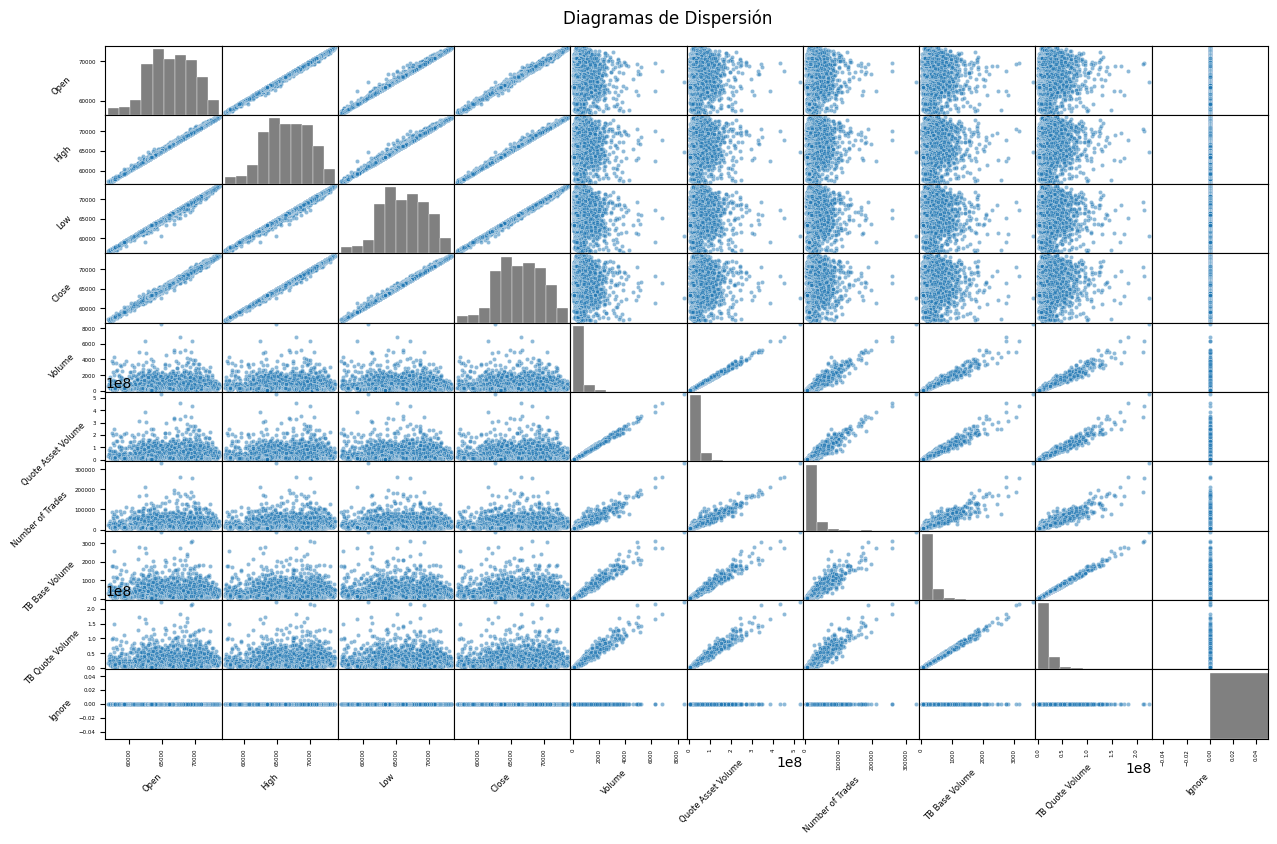

In [10]:
# Desactivar temporalmente las advertencias
warnings.filterwarnings("ignore")

# Configurar los estilos del histograma
hist_kwds = {'color':'gray', 'edgecolor': 'white', 'linewidth': 0.25}

# Generar la matriz de dispersión
scatter_matrix = pd.plotting.scatter_matrix(histo_df[numeric_cols], figsize=(15, 9), edgecolor='white', linewidth=0.3, hist_kwds=hist_kwds)

# Ajustar el tamaño de fuente de los rótulos de las variables
for ax in scatter_matrix.flatten():
    ax.tick_params(axis='both', which='major', labelsize=4)

# Ajustar la alineación de los rótulos de las variables en ambos ejes x e y
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        ax = scatter_matrix[i, j]
        if i == len(numeric_cols) - 1:
            ax.set_xlabel(numeric_cols[j], fontsize=6, rotation=45, ha='right')
        if j == 0:
            ax.set_ylabel(numeric_cols[i], fontsize=6, rotation=45, ha='right')

# Añadir un título a la figura
plt.suptitle("Diagramas de Dispersión", y=0.92)

# Mostrar la figura
plt.show()


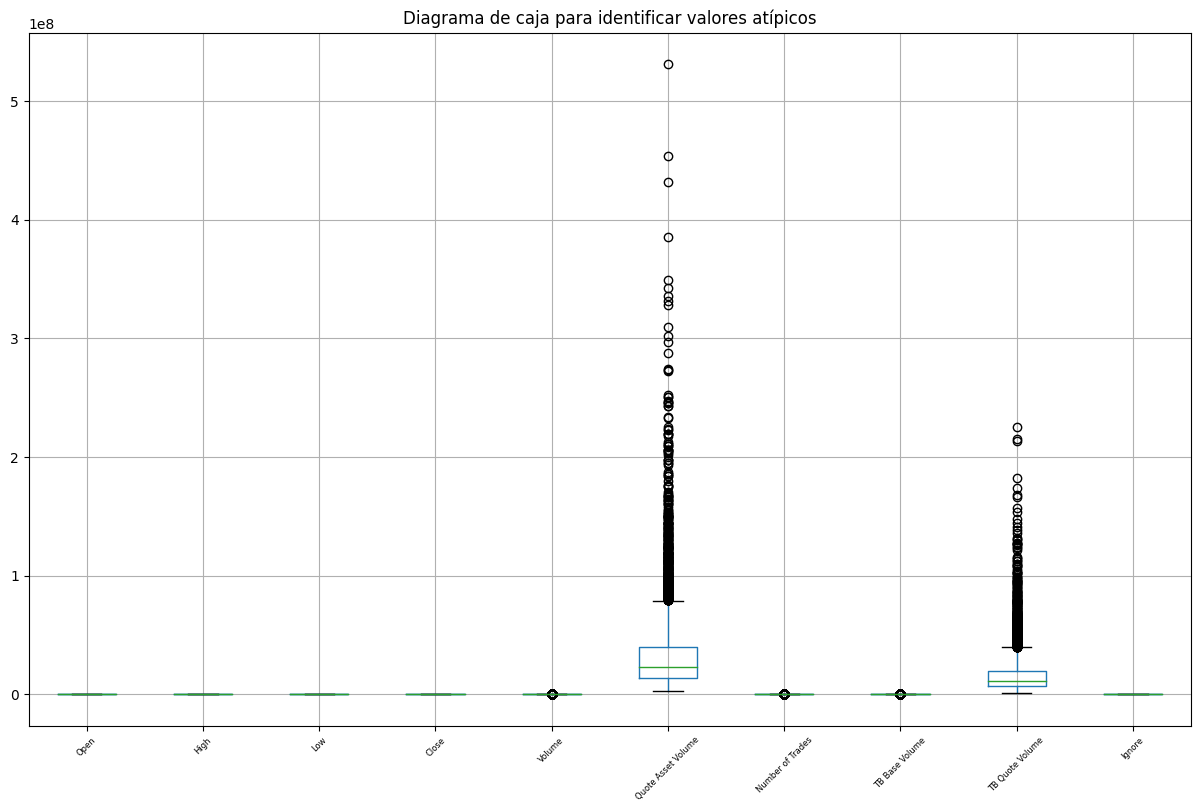

In [13]:
# Crear un diagrama de caja para cada columna numérica
plt.figure(figsize=(15, 9))
histo_df[numeric_cols].boxplot()
plt.title('Diagrama de caja para identificar valores atípicos')
plt.xticks(rotation=45, fontsize=6)
#plt.ylabel('Valor')
#plt.xlabel('Variables')
plt.show()

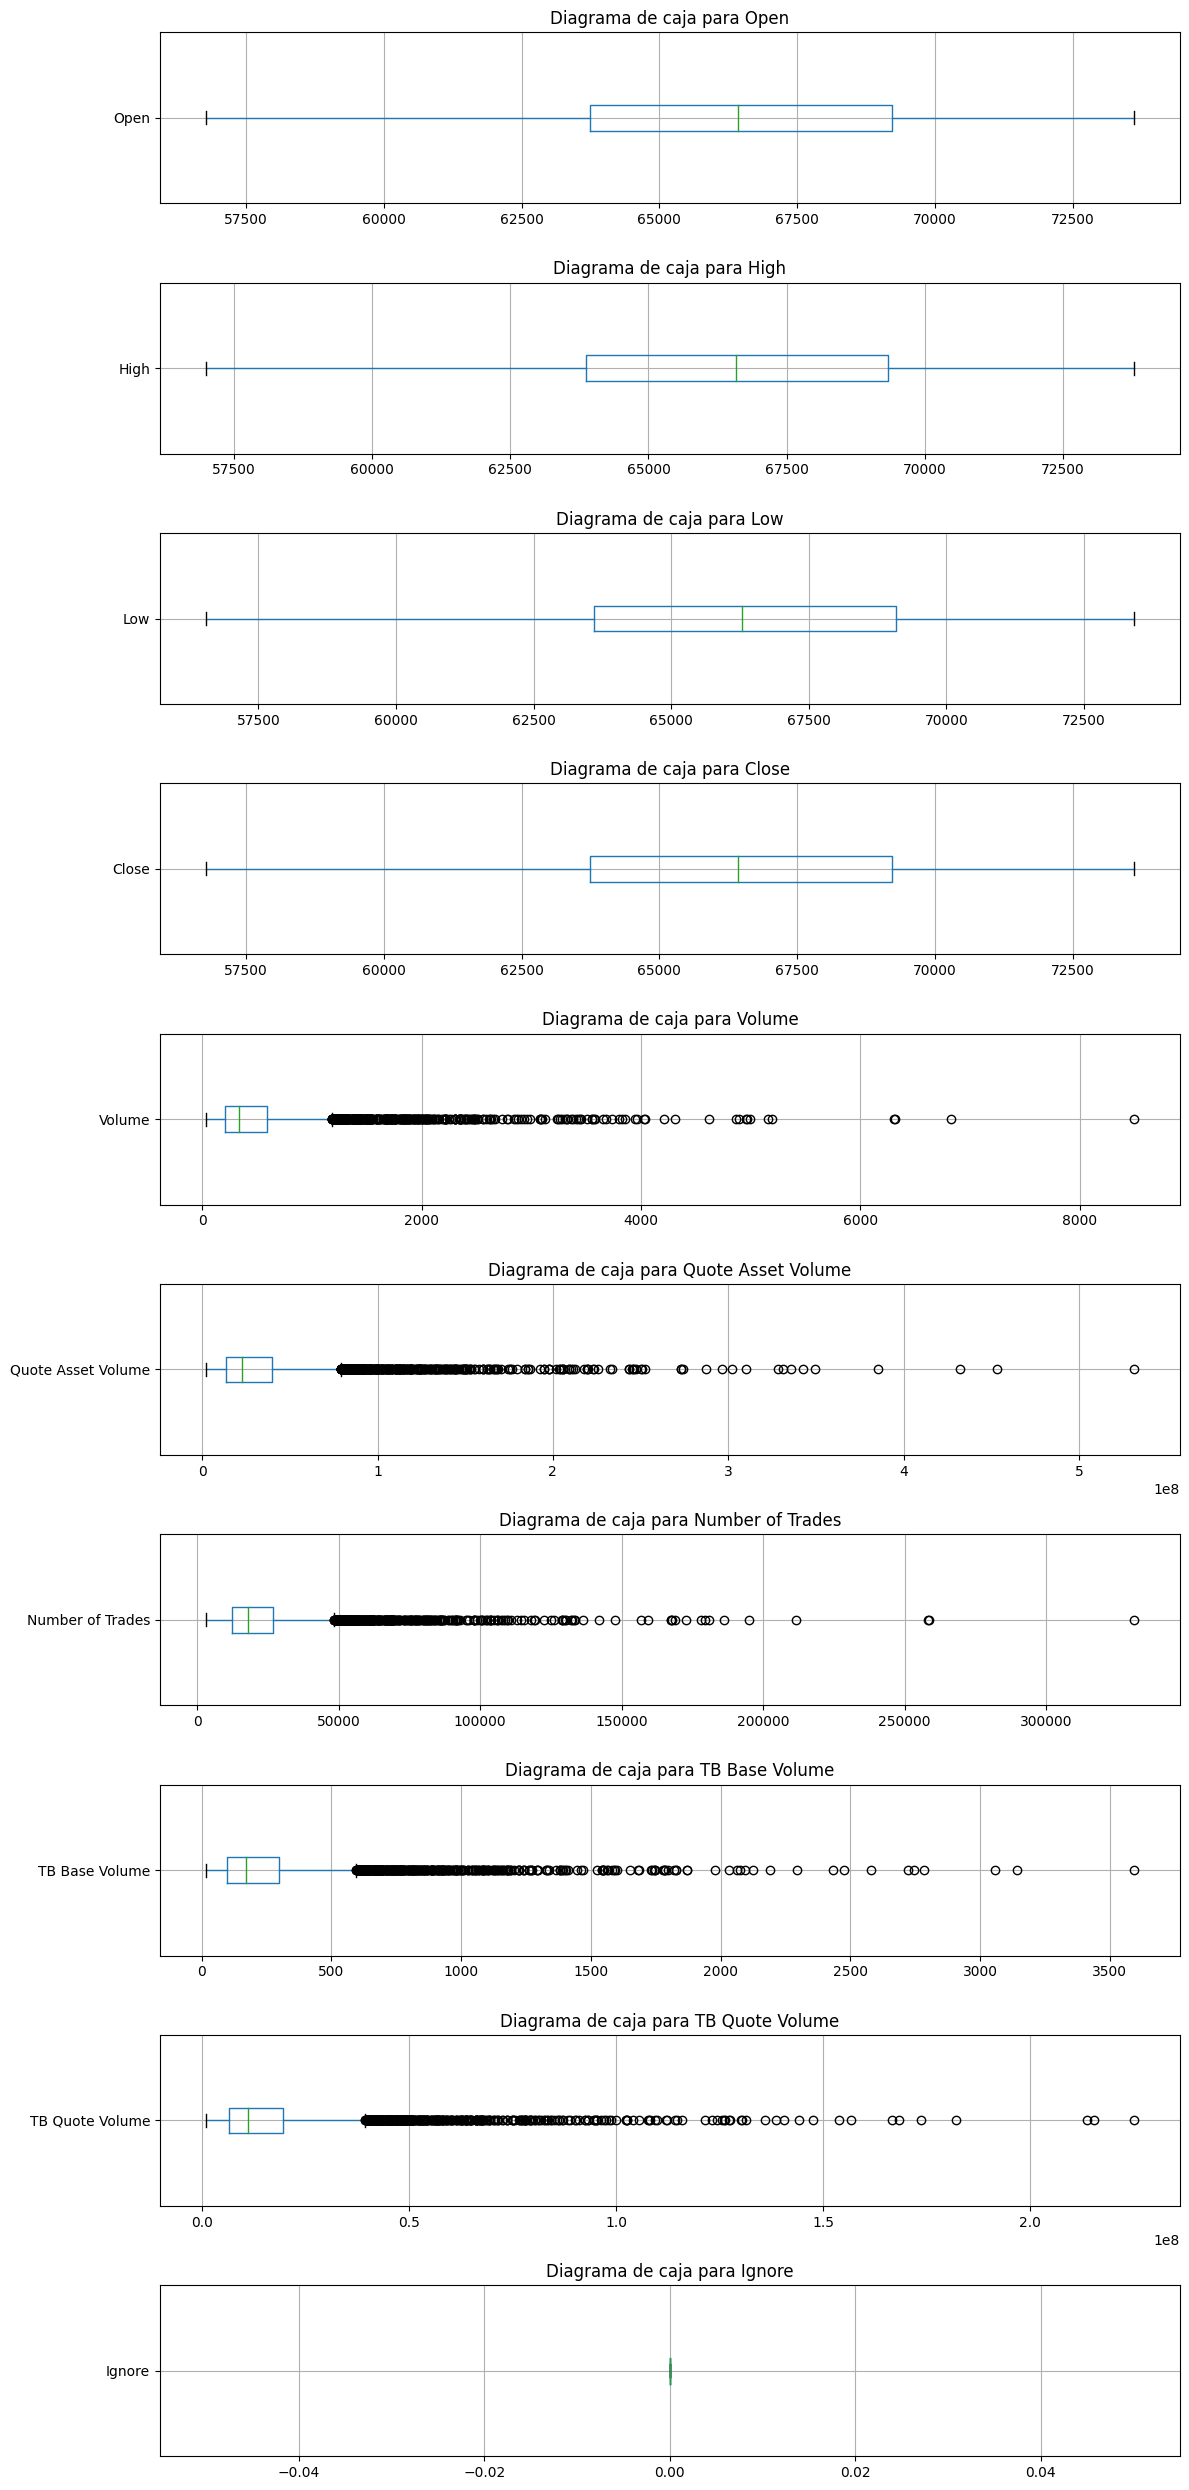

In [14]:
# Crear subtramas para cada columna numérica
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(12, len(numeric_cols) * 2.5))

# Generar un diagrama de caja para cada columna numérica en su propia subtrama
for i, col in enumerate(numeric_cols):
    histo_df[[col]].boxplot(ax=axes[i], vert=False)
    axes[i].set_title(f'Diagrama de caja para {col}')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()


**¿Cuál es la cardinalidad de las variables categóricas?**

**Respuesta:** Por el momento no estamos manejando variables categoricas en el set inicial de datos toda vez que lo estamos enfocando solo al *Bitcoin*, sin embargo mantendremos esto presente a la hora de analizar las variables categoricas futuras que *resulten*, por ejemplo, al incluir más criptomonedas principalmente en el preprocesamiento y la dimencionalidad a la hora de construir algun modelo.

In [74]:
# Obtener las columnas categóricas
categorical_cols = histo_df.select_dtypes(include=['object']).columns

# Calcular la cardinalidad de cada variable categórica
cardinalities = histo_df[categorical_cols].nunique()

# Mostrar las cardinalidades
print("")
print("Cardinalidad de las variables categóricas:")
print("")
print(cardinalities)



Cardinalidad de las variables categóricas:

Series([], dtype: float64)


**¿Existen distribuciones sesgadas en el conjunto de datos?**

In [19]:
# Calcular la asimetría y curtosis de cada variable numérica
skewness = histo_df[numeric_cols].apply(lambda x: skew(x.dropna()))
kurt = histo_df[numeric_cols].apply(lambda x: kurtosis(x.dropna()))

# Realizar la prueba de normalidad de Shapiro-Wilk para cada variable numérica
normality_test_results = {}
for col in numeric_cols:
    stat, p_value = shapiro(histo_df[col])
    normality_test_results[col] = {'Stat': stat, 'p-value': p_value}

# Identificar las variables con distribuciones sesgadas y p-values significativos
skewed_variables = [col for col in numeric_cols if abs(skewness[col]) > 0.5]  # Puedes ajustar este umbral según tu criterio
significant_p_values = {col: result for col, result in normality_test_results.items() if result['p-value'] < 0.05}

# Mostrar los resultados
print("")
print("Variables con distribuciones sesgadas:")
print(skewed_variables)
print("")
print("\nVariables con p-values significativos en la prueba de normalidad de Shapiro-Wilk:")
print(significant_p_values)
print("")



Variables con distribuciones sesgadas:
['Volume', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume']


Variables con p-values significativos en la prueba de normalidad de Shapiro-Wilk:
{'Open': {'Stat': 0.9858145713806152, 'p-value': 1.3914793435055555e-24}, 'High': {'Stat': 0.9858259558677673, 'p-value': 1.4220294611744364e-24}, 'Low': {'Stat': 0.9857493042945862, 'p-value': 1.2285554077121941e-24}, 'Close': {'Stat': 0.9858075976371765, 'p-value': 1.3729703000863549e-24}, 'Volume': {'Stat': 0.6409701704978943, 'p-value': 0.0}, 'Quote Asset Volume': {'Stat': 0.6476148366928101, 'p-value': 0.0}, 'Number of Trades': {'Stat': 0.6710156202316284, 'p-value': 0.0}, 'TB Base Volume': {'Stat': 0.6603132486343384, 'p-value': 0.0}, 'TB Quote Volume': {'Stat': 0.6645625233650208, 'p-value': 0.0}}



**Reapuesta:** Sí existen variables con distribuciones sesgadas, con las pruebas anteriores se identificaron las siguientes variables cuyos valores de asimetría son significativos:

* Volume
* Quote Asset Volume
* Number of Trades
* TB Base Volume
* TB Quote Volume

Adicionalmente con ayuda de la prueba de normalidad de *Shapiro-Wilk* se concluye que las variables no siguen una distribución normal, lo anterior con base en los p-values significativos (menor que 0.05).


**¿Necesitamos aplicar alguna transformación no lineal?**

**Respuesta:** Considerando que las variables, arriba mencionadas, tienen distribuciones sesgadas y no son normalmente distribuidas, se recomienda que pueden beneficiarse de alguna transformación no lineal para análisis  estadísticos para la preparación para generar de modelos.

Algunos opciones a explorar incluyen la transformación logarítmica, la raíz cuadrada, la transformación de *Box-Cox* y la transformación de *Yeo-Johnson*.


**¿Se identifican tendencias temporales?** (En caso de que el conjunto incluya una dimensión de tiempo).

En primer lugar construiremos algunos gráficos de las diferentes variables numericas para tratar de identificar las tendencias temporales.

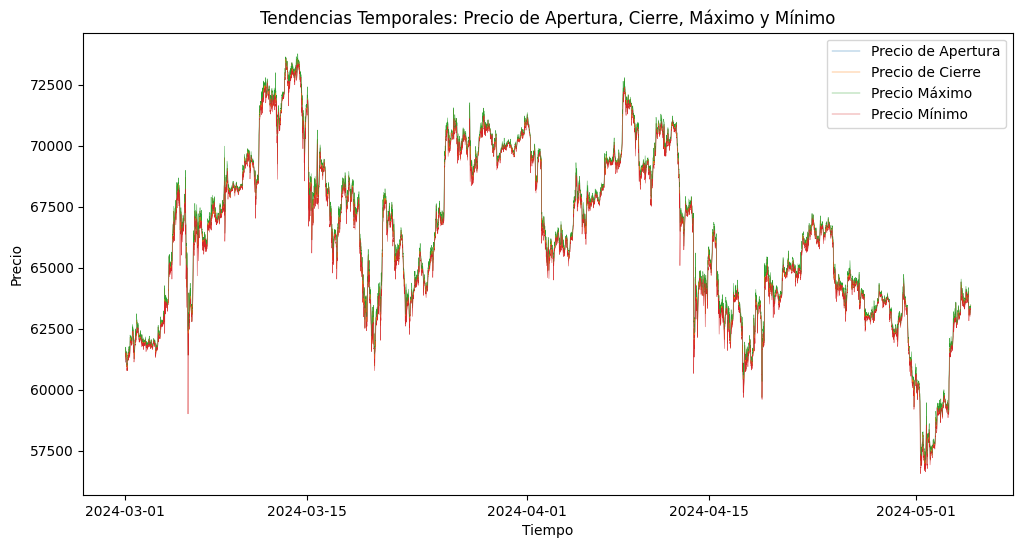

In [54]:
# Convertir las columnas 'Open Time' y 'Close Time' a objetos de tipo datetime
#histo_df['Open Time'] = pd.to_datetime(histo_df['Open Time'])
#histo_df['Close Time'] = pd.to_datetime(histo_df['Close Time'])

# Calcular el punto medio entre 'Open Time' y 'Close Time'
histo_df['Mid Time'] = histo_df[['Open Time', 'Close Time']].mean(axis=1)

# Graficar las tendencias temporales para el precio de apertura, cierre, máximo y mínimo
plt.figure(figsize=(12, 6))
plt.plot(histo_df['Open Time'], histo_df['Open'], label='Precio de Apertura', linewidth=0.3)
plt.plot(histo_df['Close Time'], histo_df['Close'], label='Precio de Cierre', linewidth=0.3)
plt.plot(histo_df['Mid Time'], histo_df['High'], label='Precio Máximo', linewidth=0.3)
plt.plot(histo_df['Mid Time'], histo_df['Low'], label='Precio Mínimo', linewidth=0.3)

plt.title('Tendencias Temporales: Precio de Apertura, Cierre, Máximo y Mínimo')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend()
plt.show()




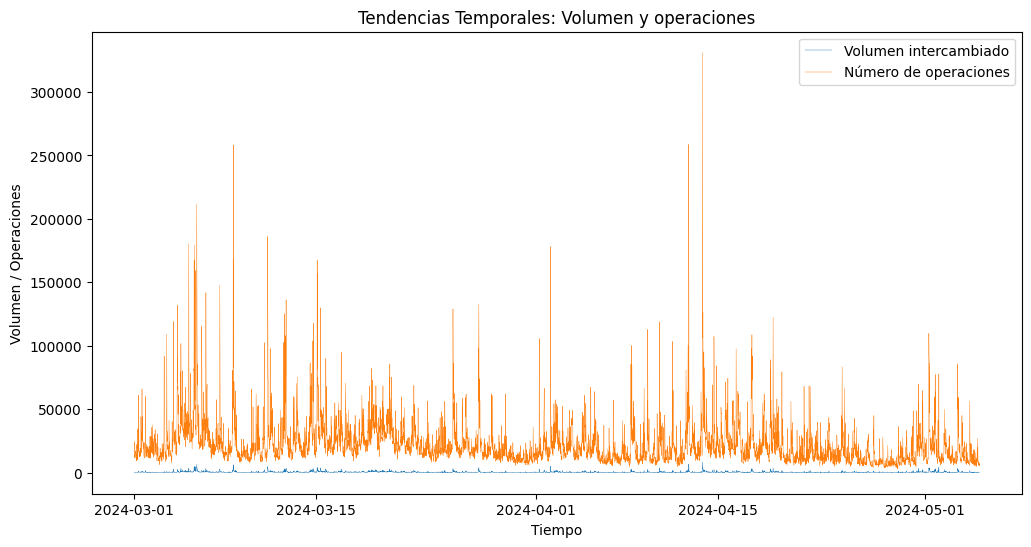

In [62]:
# Graficar las tendencias temporales para los puntos medios
plt.figure(figsize=(12, 6))
plt.plot(histo_df['Mid Time'], histo_df['Volume'], label='Volumen intercambiado', linewidth=0.3)
plt.plot(histo_df['Mid Time'], histo_df['Number of Trades'], label='Número de operaciones', linewidth=0.3)

plt.title('Tendencias Temporales: Volumen y operaciones')
plt.xlabel('Tiempo')
plt.ylabel('Volumen / Operaciones')
plt.legend()
plt.show()

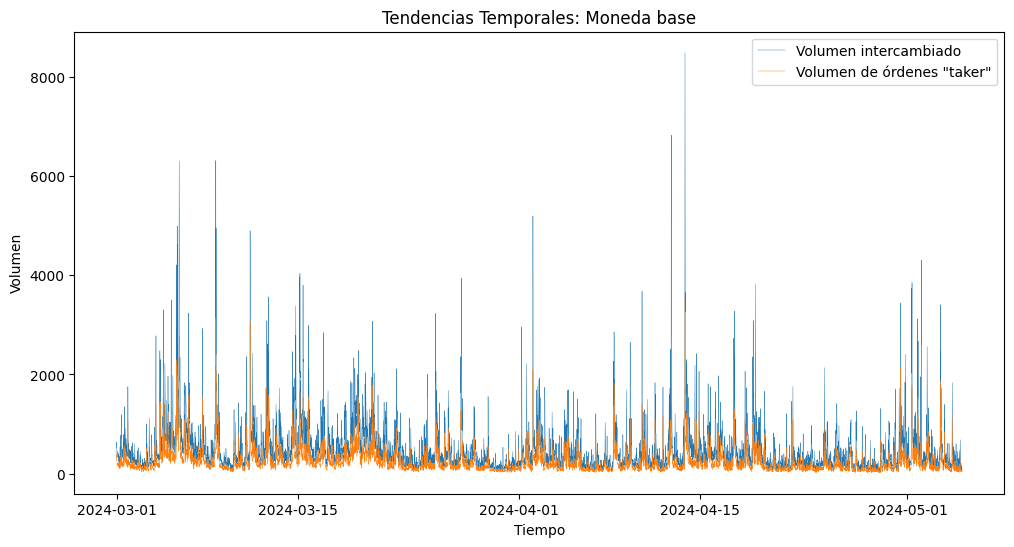

In [65]:
# Graficar las tendencias temporales para los puntos medios
plt.figure(figsize=(12, 6))
plt.plot(histo_df['Mid Time'], histo_df['Volume'], label='Volumen intercambiado', linewidth=0.3)
plt.plot(histo_df['Mid Time'], histo_df['TB Base Volume'], label='Volumen de órdenes "taker"', linewidth=0.3)

plt.title('Tendencias Temporales: Moneda base')
plt.xlabel('Tiempo')
plt.ylabel('Volumen')
plt.legend()
plt.show()


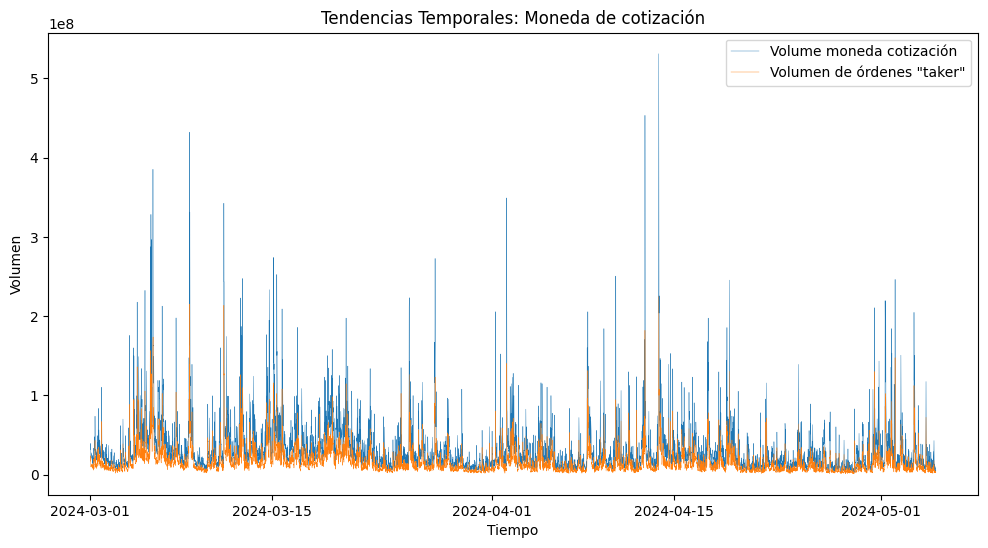

In [74]:
# Graficar las tendencias temporales
plt.figure(figsize=(12, 6))
plt.plot(histo_df['Mid Time'], histo_df['Quote Asset Volume'], label='Volume moneda cotización', linewidth=0.3)
plt.plot(histo_df['Mid Time'], histo_df['TB Quote Volume'], label='Volumen de órdenes "taker"', linewidth=0.3)

plt.title('Tendencias Temporales: Moneda de cotización')
plt.xlabel('Tiempo')
plt.ylabel('Volumen')
plt.legend()
plt.show()


Adicionalmente para identificar tendencias temporales en datos podriamos implementar: Análisis de descomposición y Modelado de series temporales.

**Análisis de descomposición:** Descompondremos las series temporales en componentes de tendencia, *estacionalidad* y ruido para comprender mejor los patrones.

En primer lugar calcularemos los coeficientes de estacionalidad para enfocar mejor el análisis.

In [94]:
def calcular_estacionalidad(data):
    """
    Calcula el coeficiente de estacionalidad para cada variable numérica en el DataFrame dado.
    """
    estacionalidad = {}
    for col in data.columns:
        if data[col].dtype in ['float64', 'int64']:
            result = seasonal_decompose(data[col], model='additive', period=30)
            estacionalidad[col] = result.seasonal.mean()
    return estacionalidad

# Calcular coeficientes de estacionalidad
coeficientes_estacionalidad = calcular_estacionalidad(histo_df)

# Mostrar coeficientes de estacionalidad
for variable, coeficiente in coeficientes_estacionalidad.items():
    print(f"Coeficiente de estacionalidad para {variable}: {coeficiente}")



Coeficiente de estacionalidad para Open: -0.04061815534017142
Coeficiente de estacionalidad para High: -0.03697476885645865
Coeficiente de estacionalidad para Low: -0.045779861521574115
Coeficiente de estacionalidad para Close: -0.043670150714414754
Coeficiente de estacionalidad para Volume: 0.0164338244381381
Coeficiente de estacionalidad para Quote Asset Volume: 929.0780347264505
Coeficiente de estacionalidad para Number of Trades: 0.5283942381438188
Coeficiente de estacionalidad para TB Base Volume: 0.005761452787745718
Coeficiente de estacionalidad para TB Quote Volume: 307.94463393772327
Coeficiente de estacionalidad para Ignore: 0.0


Podemos concluir lo siguiente:
* Las variables *Open, High, Low* y *Close* tienen coeficientes de estacionalidad cercanos a cero, lo que implica que la estacionalidad en estos precios es bastante baja.
* El *Volumen* tiene un coeficiente de estacionalidad ligeramente positivo, indica que la estacionalidad es un poco más alta, pero sigue siendo baja.
* Las variables *Quote Asset Volume* y *TB Quote Volume* tienen coeficientes de estacionalidad bastante altos, lo que sugiere una estacionalidad significativa, nos enfocaremos en estás dos variables.
* La variable *Number of Trades* también muestra una estacionalidad ligeramente alta.

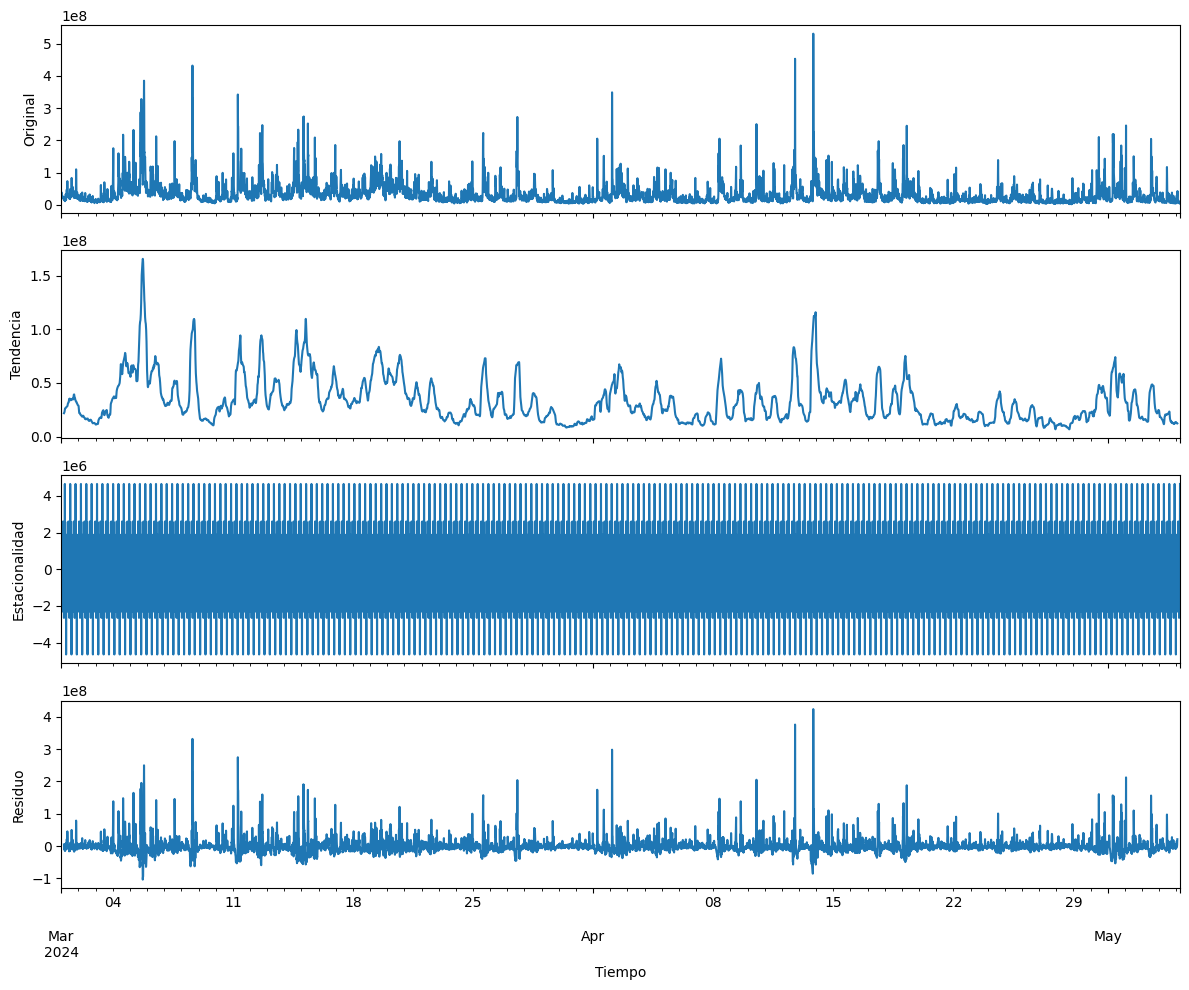

In [95]:
# Descomposición de la serie temporal
result = seasonal_decompose(histo_df['Quote Asset Volume'], model='additive', period=30)  # Se asume una periodicidad de 30 días

# Visualización de la descomposición
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Plot de la serie original
result.observed.plot(ax=ax1, legend=False)
ax1.set_ylabel('Original', fontsize=10)

# Plot de la tendencia
result.trend.plot(ax=ax2, legend=False)
ax2.set_ylabel('Tendencia', fontsize=10)

# Plot de la estacionalidad
result.seasonal.plot(ax=ax3, legend=False)
ax3.set_ylabel('Estacionalidad', fontsize=10)

# Plot del residuo
result.resid.plot(ax=ax4, legend=False)
ax4.set_ylabel('Residuo', fontsize=10)

# Ajustes de los ejes y las etiquetas
plt.xlabel('Tiempo', fontsize=10)
plt.tight_layout()
plt.show()



**Respuesta 1/2:** En la grafica de estacionalidad no hay patrones repetitivos, solamente picos, tampoco se aprecia una forma que pueda revelar información sobre la naturaleza de la estacionalidad.


**Modelado de series temporales:** Utiliza modelos estadísticos como ARIMA, SARIMA o modelos de regresión lineal para predecir valores futuros de la serie temporal.


Error cuadrático medio: 3514548841466487.0



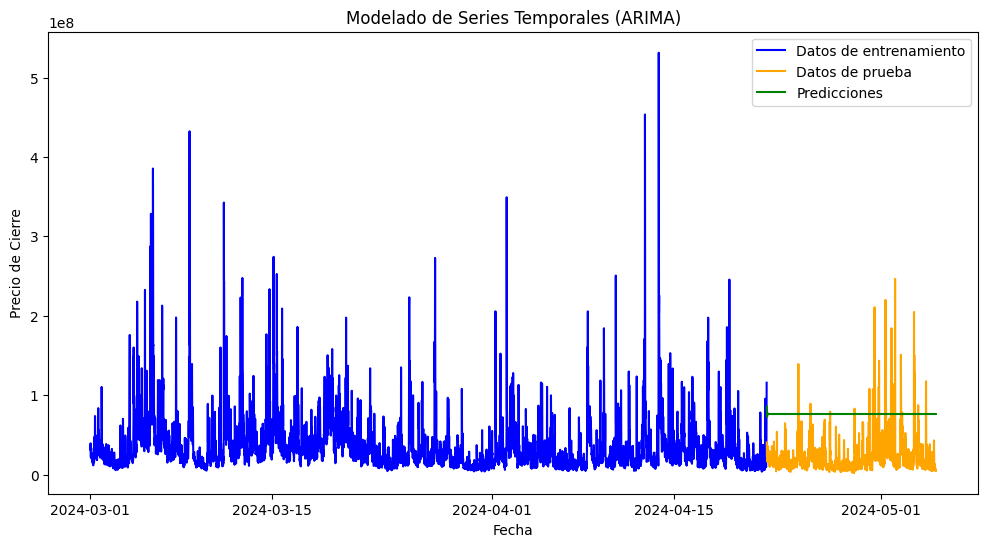

In [100]:
# Desactivar temporalmente las advertencias
warnings.filterwarnings("ignore")

# Dividir los datos en entrenamiento y prueba
train_size = int(len(histo_df) * 0.8)
train, test = histo_df['Quote Asset Volume'][:train_size], histo_df['Quote Asset Volume'][train_size:]

# Entrenar el modelo ARIMA
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Hacer predicciones
start_index = len(train)
end_index = len(train) + len(test) - 1
predictions = model_fit.predict(start=start_index, end=end_index, typ='levels')

# Calcular el error cuadrático medio
mse = mean_squared_error(test, predictions)
print("")
print('Error cuadrático medio:', mse)
print("")

# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Datos de entrenamiento', color='blue')
plt.plot(test.index, test, label='Datos de prueba', color='orange')
plt.plot(test.index, predictions, label='Predicciones', color='green')
plt.title('Modelado de Series Temporales (ARIMA)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.show()


**Respuesta 2/2:** El *MSE* es bastante alto, lo que sugiere que las predicciones del modelo *ARIMA* tienen una gran diferencia  respecto a los valores reales en los datos de prueba. Parece ser que el modelo no está capturando adecuadamente la estructura subyacente de los datos.Lo anterior puede significar en la necesidad, como se esperaba, de un modelos mas complejo y considerar otros enfoques para modelar las tendencias temporales que se presentan.

**¿Hay correlación entre las variables dependientes e independientes?**




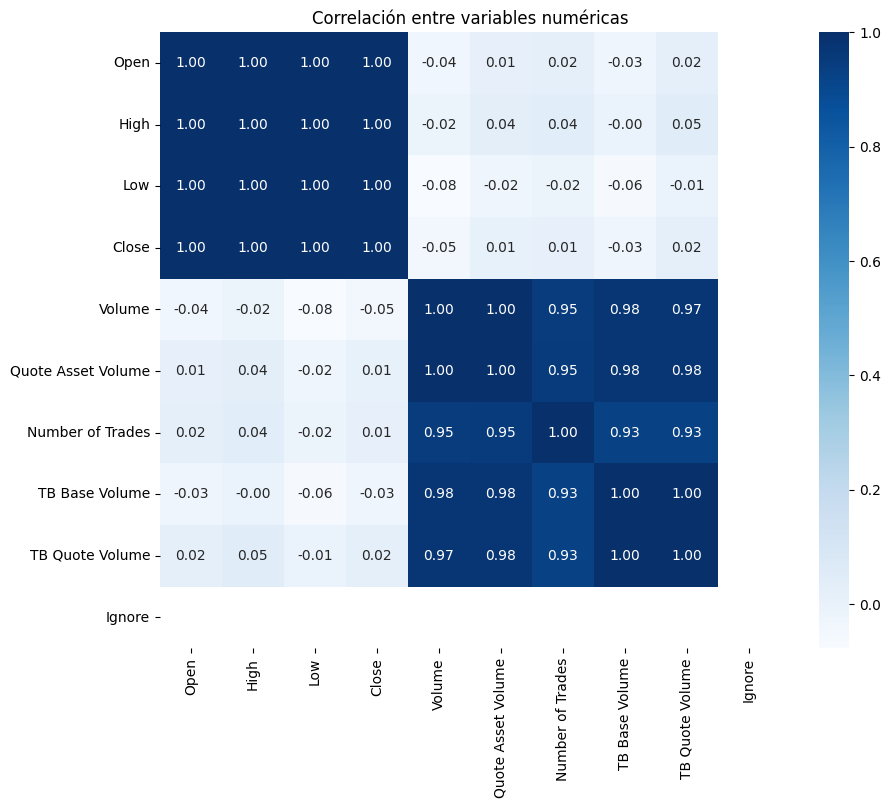

In [122]:
# Seleccionar solo las columnas numéricas
numeric_cols = histo_df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlación entre variables numéricas')
plt.show()


**Respuesta:** En la matriz de correlaciones podemos vericar la correlación de cada dupla de variables, se observan dos agrupaciones naturales con correlaciones altas: Las variables de relacionadas a los precios y las relacionadas con el volumen y las operaciones.

Graficáremos cada grupo de variables para apreciar mejor la intensidad de las correlaciones en cada grupo de variables.

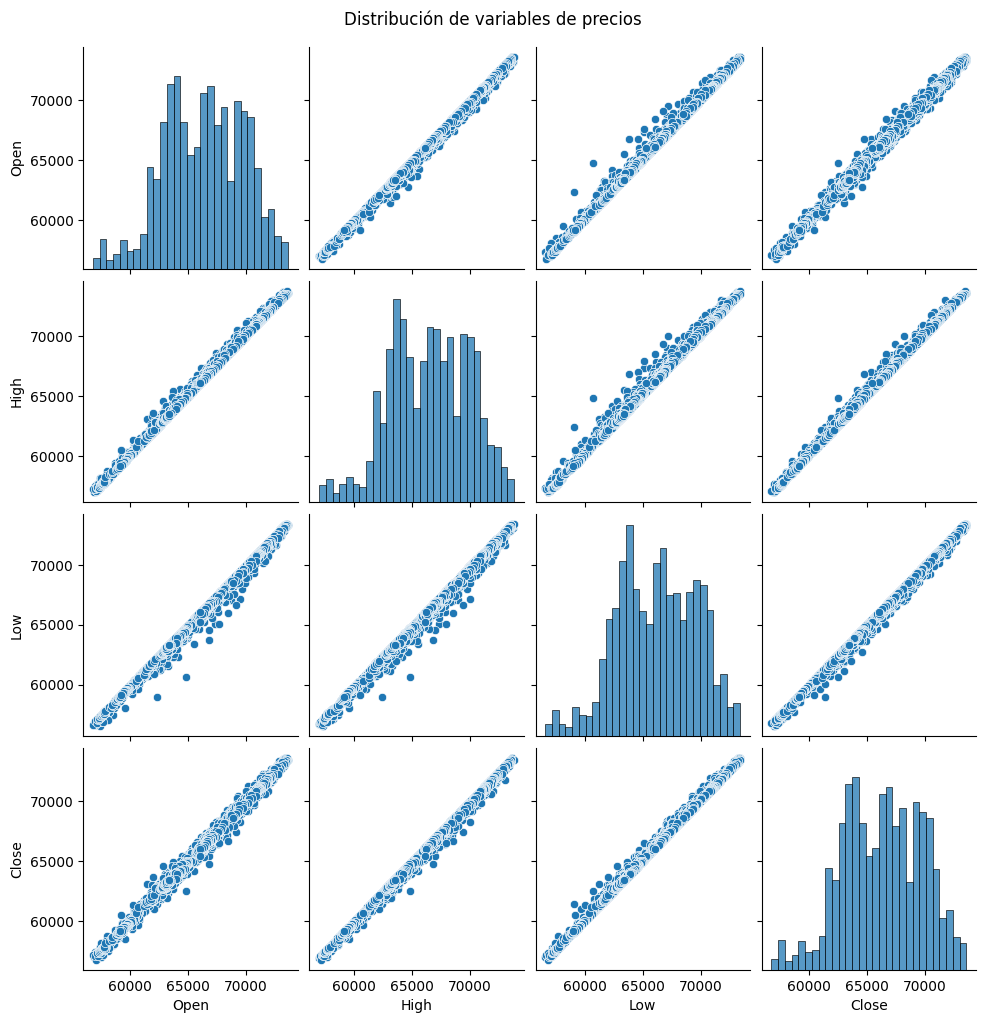

In [129]:
# Visualización de la distribución de las variables numéricas
pairplot = sns.pairplot(histo_df[['Open', 'High', 'Low', 'Close']])
pairplot.fig.suptitle('Correlación de variables de precios', y=1.02)
plt.show()



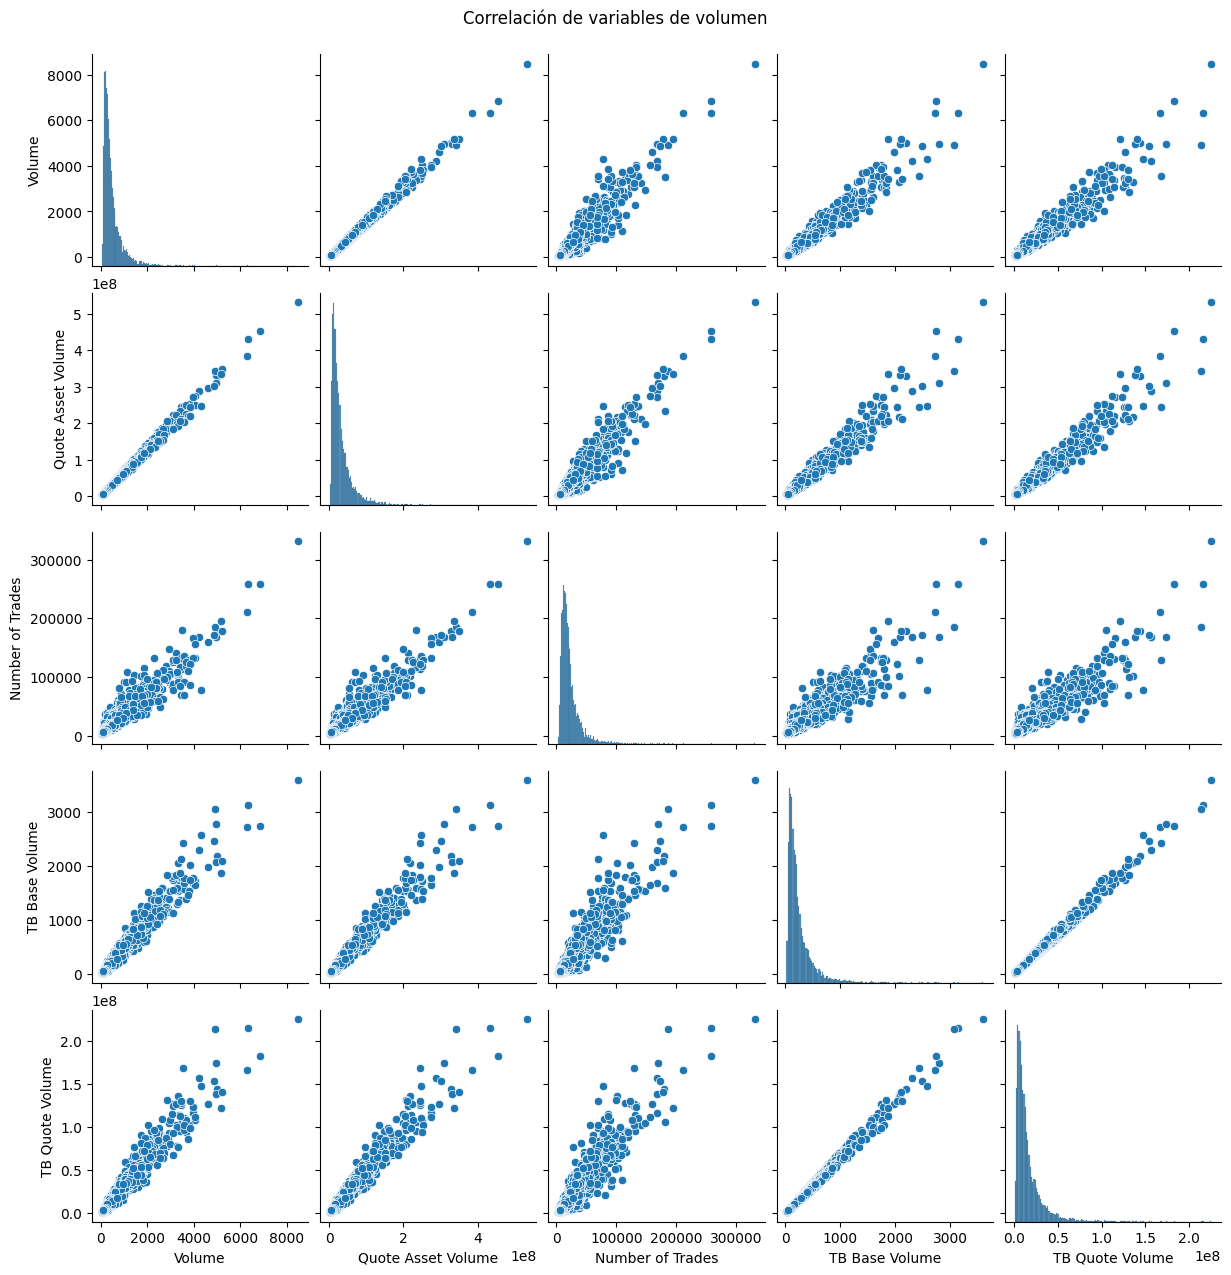

In [130]:
# Visualización de la distribución de las variables de volumen y operaciones
pairplot = sns.pairplot(histo_df[['Volume', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume']])
pairplot.fig.suptitle('Correlación de variables de volumen', y=1.02)
plt.show()


**¿Existen patrones o agrupaciones (clusters) en los datos con características similares?**

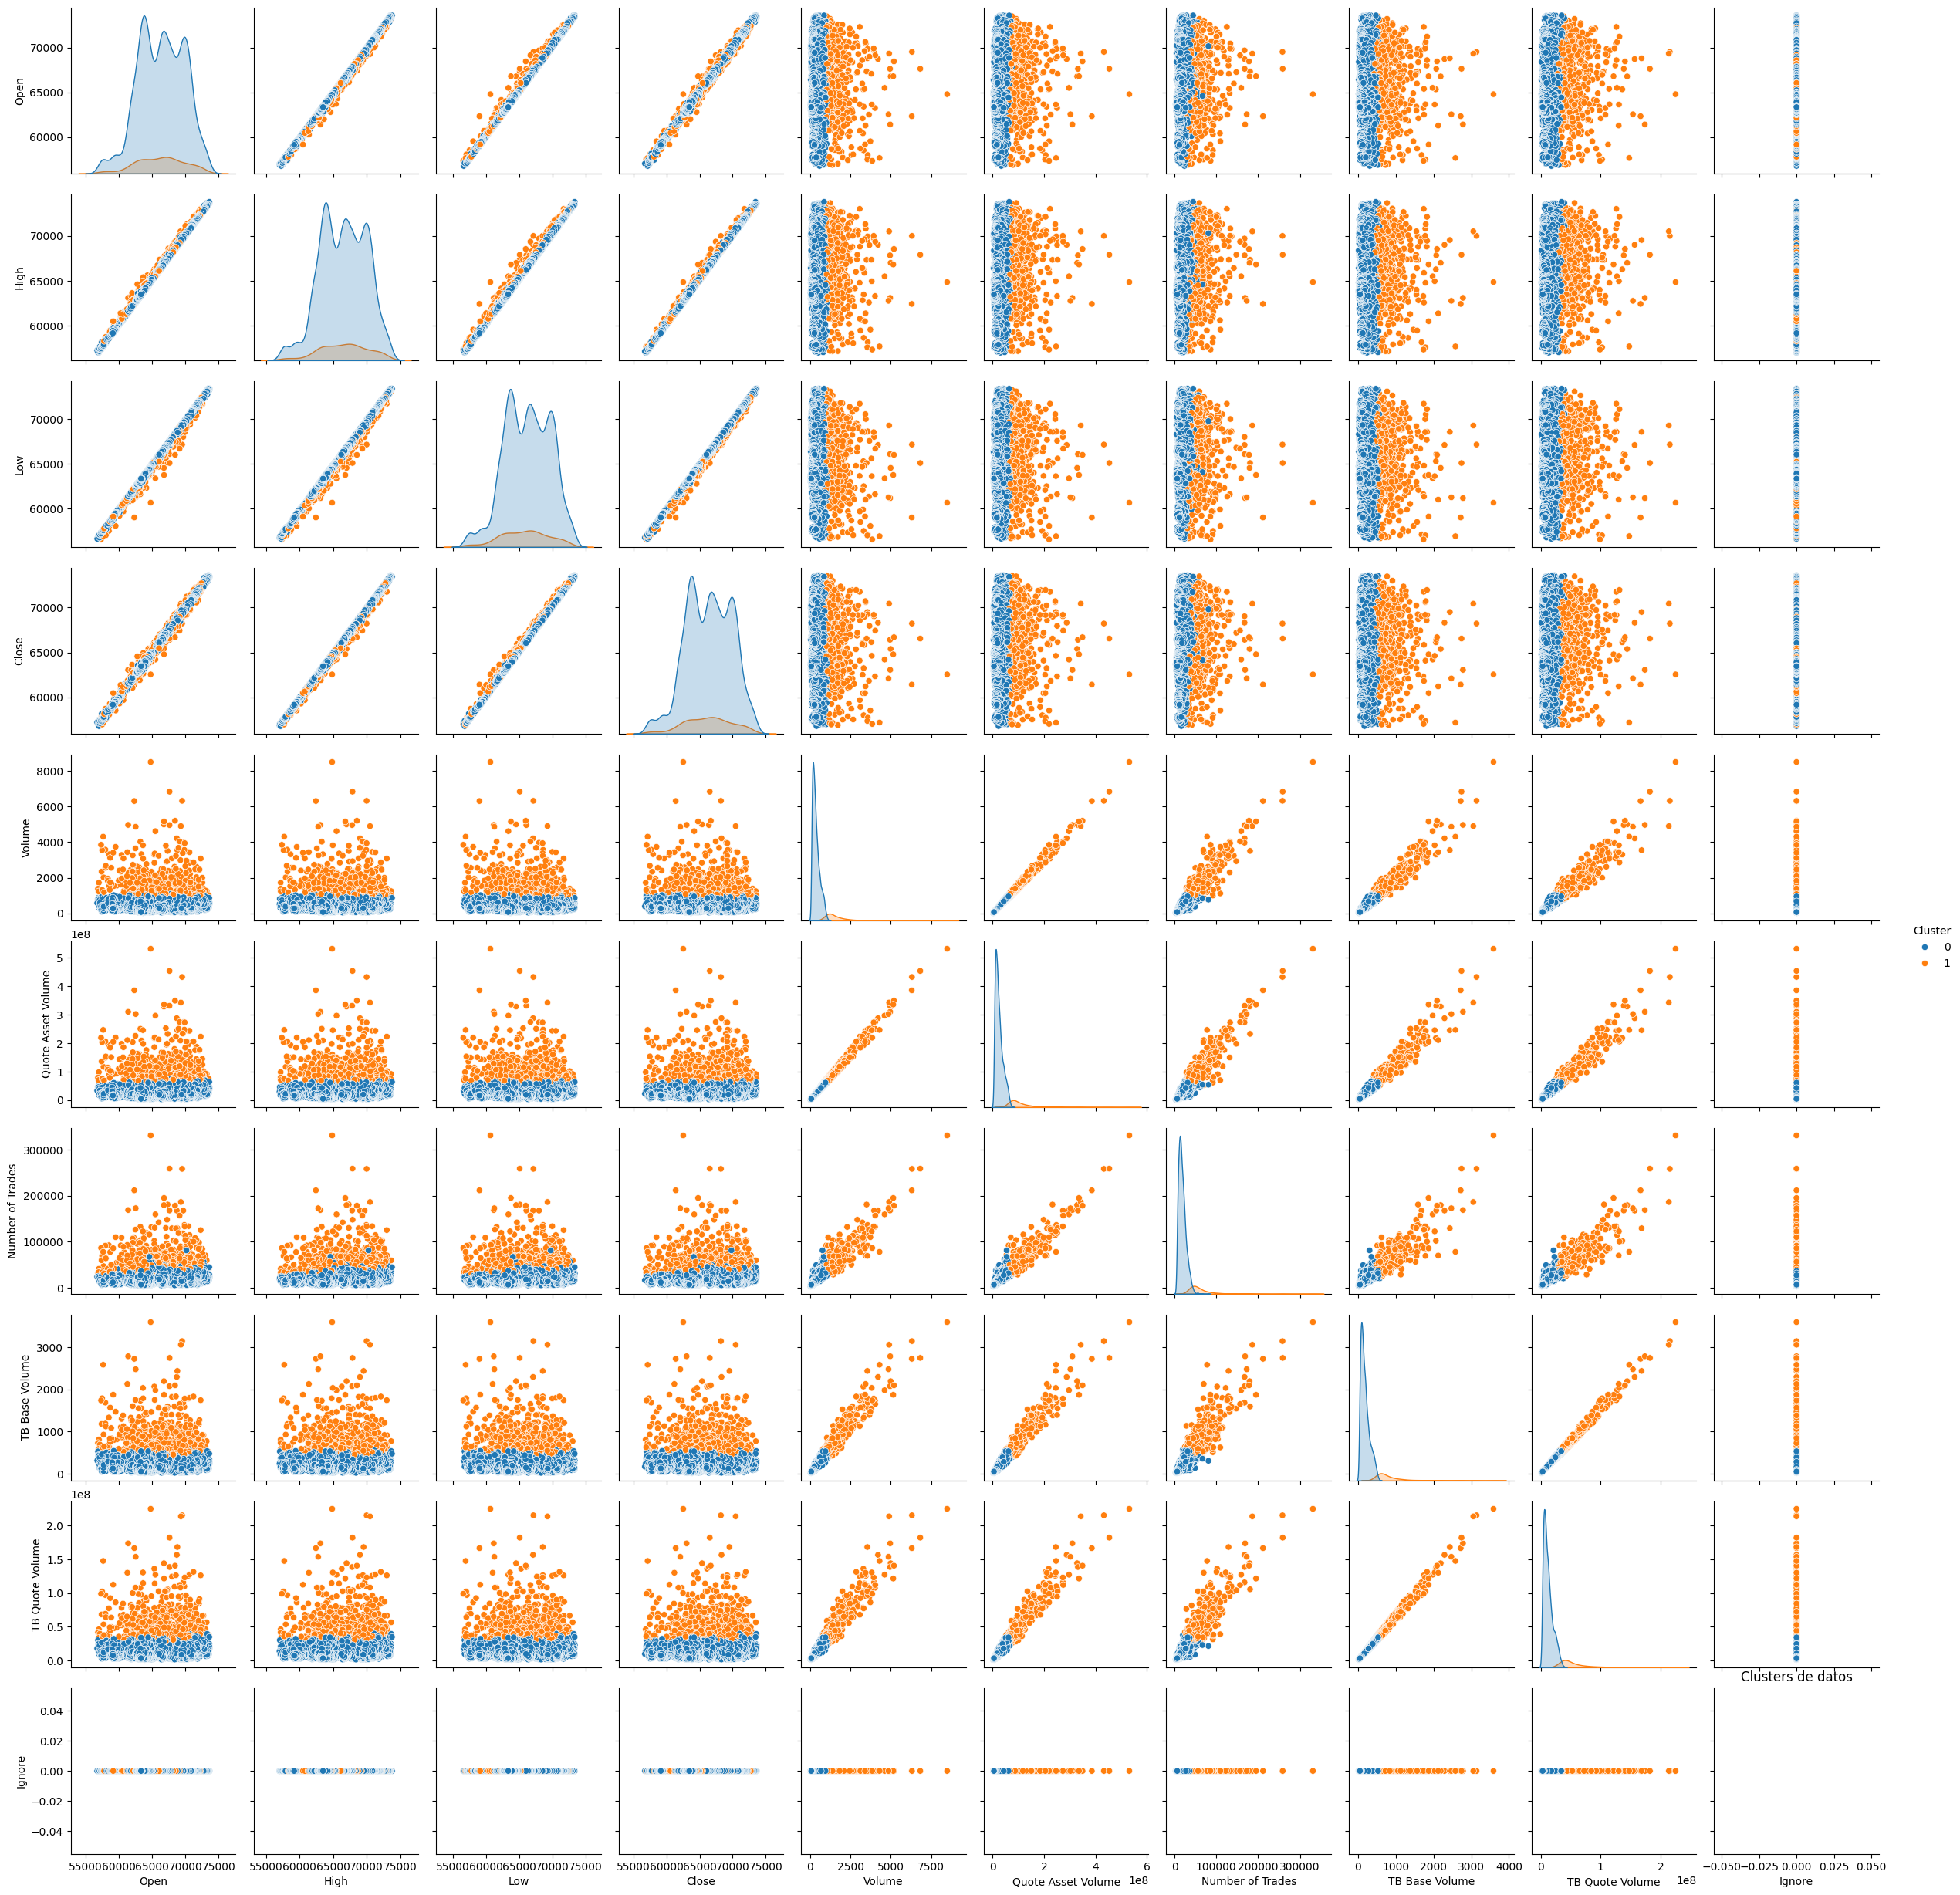

In [137]:
from sklearn.cluster import KMeans

# Seleccionar las columnas numéricas relevantes para el clustering, excluyendo la variable "Ignore"
numeric_cols = histo_df.select_dtypes(include=['float64', 'int64']).drop(columns=['Ignore'])

# Normalizar los datos
normalized_data = (numeric_cols - numeric_cols.mean()) / numeric_cols.std()

# Aplicar el algoritmo K-Means
kmeans = KMeans(n_clusters=2)  # Seleccionar el número deseado de clusters
kmeans.fit(normalized_data)

# Añadir las etiquetas de los clusters al DataFrame original
histo_df['Cluster'] = kmeans.labels_

# Visualizar los clusters
sns.pairplot(histo_df, hue='Cluster')
plt.title('Clusters de datos')
plt.show()



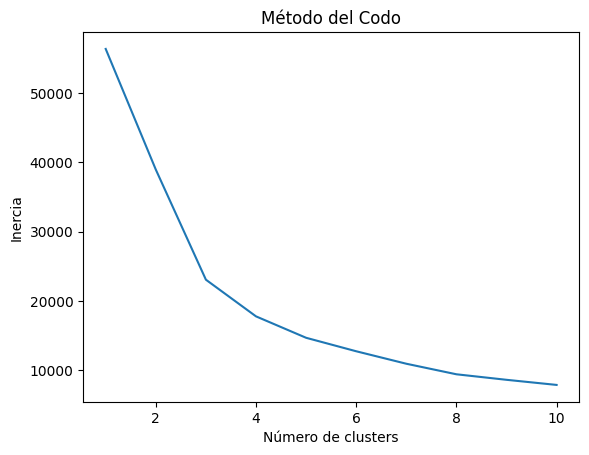

In [138]:
inertia = []
for k in range(1, 11):  # Probamos con diferentes números de clusters de 1 a 10
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()


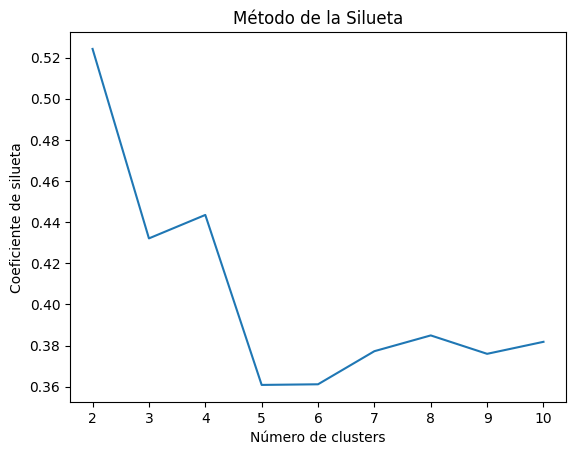

In [139]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):  # Probamos con diferentes números de clusters de 2 a 10
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(normalized_data)
    score = silhouette_score(normalized_data, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Método de la Silueta')
plt.xlabel('Número de clusters')
plt.ylabel('Coeficiente de silueta')
plt.show()


**Respuesta:** Podemos conlcuir que si hay cluster entre los datos, despues de jugar con valores entre 2 y 5 en el número de clusters, finalmente, complementando con el metodo del codo nos señala que el numero de clusters es de 3 mientras que el metodo de la silueta nos indica que son 2 clusters, como segunda opción 4.

**Hasta aqui termina la entrega 1**

Lo que esta mas adelante esta en una versión muy primigenia

------------------------------------------------------------

### Kijun Cross trading bot strategy

In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 676.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=5cd144a86a30e34c28a00e58e5372c869cc8775a039d9f122376bd5fb197c8be
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import pandas_ta as pta

### Genetic algorithm v1.0

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Paso 1: Preprocesamiento de datos
# No hay que hacer preprocesamiento especial en este ejemplo
# Asegurémonos de que no haya valores faltantes en el DataFrame
hist_df.dropna(inplace=True)

# Convertir la columna de fecha a un objeto de fecha y extraer características relevantes
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time'])
hist_df['Year'] = hist_df['Close Time'].dt.year
hist_df['Month'] = hist_df['Close Time'].dt.month
hist_df['Day'] = hist_df['Close Time'].dt.day
hist_df['Hour'] = hist_df['Close Time'].dt.hour
hist_df['Minute'] = hist_df['Close Time'].dt.minute

# Paso 2: Selección de características
# Tomaremos todas las características numéricas como variables de entrada
X = hist_df.drop(columns=['Close', 'Close Time']).values
y = hist_df['Close'].values

# Paso 3: División de datos
# Utilizaremos validación cruzada de series temporales para dividir los datos
tscv = TimeSeriesSplit(n_splits=5)

# Paso 4: Definición de modelos y búsqueda de hiperparámetros
models = [
    (LinearRegression(), {}),
    (SVR(), {'kernel': ['linear', 'poly', 'rbf'], 'C': [0.1, 1, 10]}),
    (RandomForestRegressor(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    (GradientBoostingRegressor(), {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10], 'learning_rate': [0.01, 0.1, 0.5]}),
    (XGBRegressor(), {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10], 'learning_rate': [0.01, 0.1, 0.5]})
]

best_models = []
for model, param_grid in models:
    grid_search = GridSearchCV(model, param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X, y)
    best_models.append((grid_search.best_estimator_, grid_search.best_params_))

# Paso 5: Entrenamiento y evaluación de modelos
for model, _ in best_models:
    mse_scores = []  # Almacenar puntajes MSE para cada modelo
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Entrenar y evaluar el modelo
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

    # Calcular el promedio de los puntajes MSE para el modelo actual
    avg_mse = np.mean(mse_scores)
    print(f"Modelo: {type(model).__name__}, Puntaje MSE promedio: {avg_mse}")

# Paso 6: Visualización de resultados
plt.figure(figsize=(10, 6))
plt.plot(hist_df.index, hist_df['Close'], label='Actual')
for model, _ in best_models:
    y_pred = model.predict(X)
    plt.plot(hist_df.index, y_pred, label=type(model).__name__)
plt.title('Predicciones de precios de cierre')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.legend()
plt.show()


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py", line 648, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
TypeError: float() argument must be a string or a real number, not 'Timestamp'


### Machine learning

In [ ]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df' que contiene los datos históricos de precios
# 'Close' es la columna que contiene los precios de cierre
# Asumimos que 'Close' es una serie temporal ordenada cronológicamente

# Calcular la media y la desviación estándar de los precios de cierre
mean_price = hist_df['Close'].mean()
std_dev_price = hist_df['Close'].std()

# Definir un umbral para identificar anomalías (por ejemplo, 3 desviaciones estándar)
threshold = 2.5 * std_dev_price

# Identificar los puntos de datos que están más allá del umbral de anomalía
anomalies = hist_df[abs(hist_df['Close'] - mean_price) > threshold]

# Imprimir los puntos de datos que se consideran anomalías
print("Anomalías detectadas:")
print(anomalies)


Anomalías detectadas:
Empty DataFrame
Columns: [Open Time, Open, High, Low, Close, Volume, Close Time, Quote Asset Volume, Number of Trades, TB Base Volume, TB Quote Volume, Ignore]
Index: []


In [ ]:
# Supongamos que tienes un DataFrame llamado 'df' que contiene los datos históricos de precios
# 'Close' es la columna que contiene los precios de cierre
# Asumimos que 'Close' es una serie temporal ordenada cronológicamente

# Calcular los cambios porcentuales en los precios de cierre
hist_df['Price Change'] = hist_df['Close'].pct_change() * 100

# Identificar los momentos en los que haya cambios en los precios mayores al 5%
significant_changes = hist_df[(abs(hist_df['Price Change']) > 5)]

# Imprimir los momentos con cambios significativos en los precios
print("Momentos de variaciones de precio mayores al 5%:")
print(significant_changes)

Momentos de variaciones de precio mayores al 5%:
Empty DataFrame
Columns: [Open Time, Open, High, Low, Close, Volume, Close Time, Quote Asset Volume, Number of Trades, TB Base Volume, TB Quote Volume, Ignore, Price Change]
Index: []


In [ ]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'hist_df' que contiene los datos históricos de precios
# 'Close' es la columna que contiene los precios de cierre
# Asumimos que 'Close' es una serie temporal ordenada cronológicamente

# Calcular los cambios porcentuales en los precios de cierre
hist_df['Price Change'] = hist_df['Close'].pct_change() * 100

# Identificar los momentos en los que haya cambios en los precios mayores al 5%
significant_changes = hist_df[abs(hist_df['Price Change']) > 2.5]

# Imprimir los momentos con cambios significativos en los precios
print("Momentos de variaciones de precio mayores al 3.1%:")
print(significant_changes)


Momentos de variaciones de precio mayores al 3.1%:
               Open Time      Open      High       Low     Close      Volume  \
464  2024-03-05 20:00:00  61410.98  63099.66  61167.91  63052.53  4966.25356   
3082 2024-04-02 02:30:00  68447.76  68536.00  66000.00  66696.00  5198.75291   
4207 2024-04-13 19:45:00  66791.21  66814.57  63750.01  64788.01  5158.34220   
4208 2024-04-13 20:00:00  64788.01  64853.90  60660.57  62543.00  8491.63012   
4218 2024-04-13 22:30:00  62791.06  64615.38  62772.00  64558.38  2299.74327   
4730 2024-04-19 06:30:00  62007.34  63638.77  62001.30  63630.76  1983.89992   

                        Close Time  Quote Asset Volume  Number of Trades  \
464  2024-03-05 20:14:59.999000064        3.099005e+08            168757   
3082 2024-04-02 02:44:59.999000064        3.492209e+08            178164   
4207 2024-04-13 19:59:59.999000064        3.355893e+08            194933   
4208 2024-04-13 20:14:59.999000064        5.312305e+08            330919   
4218 202

In [ ]:
!pip install deap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from deap import base, creator, tools, algorithms

# Supongamos que tienes un DataFrame llamado 'hist_df' que contiene los datos históricos de precios
# 'Close' es la columna que contiene los precios de cierre
# Asumimos que 'Close' es una serie temporal ordenada cronológicamente

# Paso 1: Preprocesamiento de datos
# No hay que hacer preprocesamiento especial en este ejemplo

# Paso 2: Selección de características
# En este ejemplo, utilizaremos solo el precio de cierre como característica
features = np.array(hist_df['Close']).reshape(-1, 1)

# Paso 3: Definición de la estructura del modelo genético
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", np.ndarray, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=len(features))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evaluate(individual):
    # Aquí iría tu lógica para evaluar el rendimiento de un individuo (modelo)
    # Por ejemplo, puedes utilizar un modelo de regresión con los pesos dados por el individuo
    # y calcular una métrica de rendimiento, como el coeficiente de determinación (R²)
    return np.sum(individual),

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Paso 4: Codificación de las soluciones
# Los individuos en este ejemplo representan los pesos de un modelo de regresión

# Paso 5: Evaluación del modelo
# No se hace en esta etapa, ya que se realizará durante el proceso evolutivo

# Paso 6: Ajuste de hiperparámetros
# Configuración de los hiperparámetros del algoritmo genético
population_size = 100
num_generations = 50

# Creación de la población inicial
population = toolbox.population(n=population_size)

# Evolución de la población a lo largo de varias generaciones
for gen in range(num_generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))

# Mejor individuo (modelo) después de la evolución
best_individual = tools.selBest(population, k=1)[0]

# Paso 7: Validación cruzada
# No se realiza en este ejemplo, pero es importante considerarlo en aplicaciones reales

# Paso 8: Predicciones
# Aquí podrías utilizar el mejor individuo (modelo) para hacer predicciones sobre los precios futuros

# Imprimir los mejores pesos encontrados
print("Mejores pesos encontrados:")
print(best_individual)


Mejores pesos encontrados:
[ 1.17491132  1.64277569  2.09721876 ...  0.54723991  0.59799214
 -0.3847986 ]


In [ ]:
import pandas as pd
import numpy as np
from deap import base, creator, tools, algorithms
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Supongamos que tienes un DataFrame llamado 'hist_df' que contiene los datos históricos de precios
# 'Close' es la columna que contiene los precios de cierre
# Asumimos que 'Close' es una serie temporal ordenada cronológicamente

# Paso 1: Preprocesamiento de datos
# No hay que hacer preprocesamiento especial en este ejemplo

# Paso 2: Selección de características
# En este ejemplo, utilizaremos solo el precio de cierre como característica
features = np.array(hist_df['Close']).reshape(-1, 1)

# Paso 3: Definición de la estructura del modelo genético
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", np.ndarray, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=len(features))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evaluate(individual):
    # Aquí iría tu lógica para evaluar el rendimiento de un individuo (modelo)
    # Utilizaremos validación cruzada para evaluar el rendimiento
    tscv = TimeSeriesSplit(n_splits=5)
    scores = []
    for train_index, test_index in tscv.split(features):
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = features[train_index], features[test_index]

        # Entrenar un modelo de regresión lineal utilizando los pesos dados por el individuo
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Hacer predicciones sobre los datos de prueb


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
# Paso 8: Predicciones
# Aquí podrías utilizar el mejor individuo (modelo) para hacer predicciones sobre los precios futuros

# Entrenar el modelo final con todos los datos disponibles
model = LinearRegression()
model.fit(features, features)

# Hacer predicciones sobre los precios futuros
future_prices = model.predict(features[-1].reshape(1, -1))

# Imprimir la predicción del precio futuro
print("Predicción del precio futuro:", future_prices[0])


Predicción del precio futuro: [64962.]


In [ ]:
# Paso 8: Predicciones
# Definir el rango de tiempo futuro para el cual deseamos hacer predicciones
num_steps = 30  # Por ejemplo, queremos hacer predicciones para los próximos 30 días

# Inicializar una lista para almacenar las predicciones
future_price_predictions = []

# Hacer predicciones para cada punto de tiempo futuro dentro del rango definido
for i in range(num_steps):
    # Hacer una predicción para el próximo punto de tiempo
    future_price = model.predict(features[-1 + i].reshape(1, -1))

    # Agregar la predicción a la lista de predicciones
    future_price_predictions.append(future_price[0])

# Imprimir la serie de predicciones
print("Serie de predicciones de precios futuros:")
print(future_price_predictions)


Serie de predicciones de precios futuros:
[array([64962.]), array([61224.49]), array([61716.74]), array([61583.53]), array([61501.11]), array([61340.71]), array([61503.18]), array([61408.93]), array([61214.35]), array([60968.31]), array([60931.1]), array([61034.]), array([60980.]), array([60954.61]), array([60791.76]), array([61003.64]), array([61105.91]), array([61177.55]), array([61354.29]), array([61301.11]), array([61524.09]), array([61500.]), array([61427.11]), array([61476.34]), array([61312.01]), array([61483.32]), array([61668.57]), array([61545.27]), array([61568.18]), array([61712.32])]


In [ ]:
import pandas as pd
import numpy as np
from deap import base, creator, tools, algorithms
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Supongamos que tienes un DataFrame llamado 'hist_df' que contiene los datos históricos de precios
# 'Close' es la columna que contiene los precios de cierre
# Asumimos que 'Close' es una serie temporal ordenada cronológicamente

# Paso 1: Preprocesamiento de datos
# No hay que hacer preprocesamiento especial en este ejemplo

# Paso 2: Selección de características
# En este ejemplo, utilizaremos solo el precio de cierre como característica
features = np.array(hist_df['Close']).reshape(-1, 1)

# Paso 3: Definición de la estructura del modelo genético
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", np.ndarray, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=len(features))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evaluate(individual):
    # Aquí iría tu lógica para evaluar el rendimiento de un individuo (modelo)
    # Utilizaremos validación cruzada para evaluar el rendimiento
    tscv = TimeSeriesSplit(n_splits=5)
    scores = []
    for train_index, test_index in tscv.split(features):
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = features[train_index], features[test_index]

        # Entrenar un modelo de regresión lineal utilizando los pesos dados por el individuo
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Hacer predicciones sobre los datos de prueba
        y_pred = model.predict(X_test)

        # Calcular las métricas de rendimiento
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Agregar las métricas a la lista de puntajes
        scores.append((mse, rmse, mae, r2))

    # Calcular el promedio de las métricas de rendimiento sobre todos los pliegues
    avg_scores = np.mean(scores, axis=0)

    # Retornar la inversa del RMSE (ya que estamos maximizando la aptitud)
    if avg_scores[1] == 0:
        return float('inf'),  # Retornar infinito para evitar la división por cero
    else:
        return 1 / avg_scores[1],

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Paso 4: Codificación de las soluciones
# Los individuos en este ejemplo representan los pesos de un modelo de regresión

# Paso 5: Evaluación del modelo
# No se hace en esta etapa, ya que se realizará durante el proceso evolutivo

# Paso 6: Ajuste de hiperparámetros
# Configuración de los hiperparámetros del algoritmo genético
population_size = 100
num_generations = 50

# Creación de la población inicial
population = toolbox.population(n=population_size)

# Evolución de la población a lo largo de varias generaciones
for gen in range(num_generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))

# Mejor individuo (modelo) después de la evolución
best_individual = tools.selBest(population, k=1)[0]

# Paso 7: Validación cruzada
# Realizamos la evaluación final utilizando todos los datos disponibles
final_score = evaluate(best_individual)
print("Puntaje final del mejor individuo:", final_score)

# Imprimir las métricas de rendimiento si existen en final_score
if len(final_score) > 0:
    print("Métricas de rendimiento del mejor individuo:")
    print("MSE:", final_score[0])
    print("RMSE:", 1 / final_score[0])  # Evitar división por cero
    print("MAE:", final_score[1]) if len(final_score) > 1 else None  # Verificar si MAE está presente
    print("R^2:", final_score[2]) if len(final_score) > 2 else None  # Verificar si R^2 está presente
else:
    print("No se encontraron métricas de rendimiento para el mejor individuo.")

# Paso 8: Predicciones
# Aquí podrías utilizar el mejor individuo (modelo) para hacer predicciones sobre los precios futuros

# Imprimir los mejores pesos encontrados
print("Mejores pesos encontrados:")
print(best_individual)


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Puntaje final del mejor individuo: (inf,)
Métricas de rendimiento del mejor individuo:
MSE: inf
RMSE: 0.0
Mejores pesos encontrados:
[ 1.6732027   2.66909681 -1.58608844 ... -0.33427779  0.10518143
 -0.62487964]


modelos

In [ ]:
import datetime

# Convertir el tiempo UNIX a formato legible por humanos
fecha_hora = datetime.datetime.fromtimestamp(1636588800000 / 1000)  # dividido por 1000 para convertir de milisegundos a segundos
print(fecha_hora)

2021-11-11 00:00:00
